# Credit Card data Sampling
### Abstract

This the procedure taken to sample the dataset for the credit card fraud detection model ('creditcard.csv'), considering the fact that the target data is imbalanced that is in  284807 rows, 492 rows were fraudlent transsactions and 284315 were valid transactions but taken at random 2000 rows of the 'creditcard.csv' dataset and merging with the 492 rows of fraudlent transaction, though we still have an imbalanced dataset, in balancing the data set we would be using the Synthetic Minority Over-sampling Technique (SMOTE).

## Packages Import

In [15]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

## Load Datasets and Explanatory Data Analysis 

In [2]:
df_creditcard = pd.read_csv('data/creditcard.csv')

In [3]:
# getting the columns of the datasets
column = df_creditcard.columns
shape = df_creditcard.shape

print (column)
print ("shape of the dataset: {}".format(shape))

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
shape of the dataset: (284807, 31)


In [4]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df_creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


C:\Users\KINE PI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

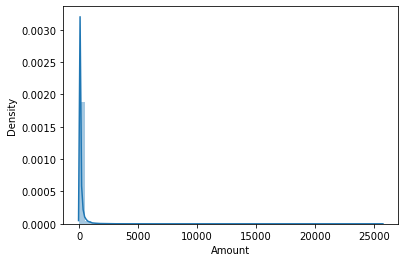

In [28]:
sns.distplot(df_creditcard["Amount"])

C:\Users\KINE PI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

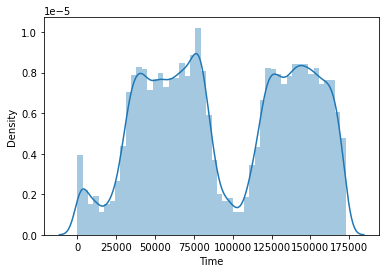

In [27]:
sns.distplot(df_creditcard["Time"])

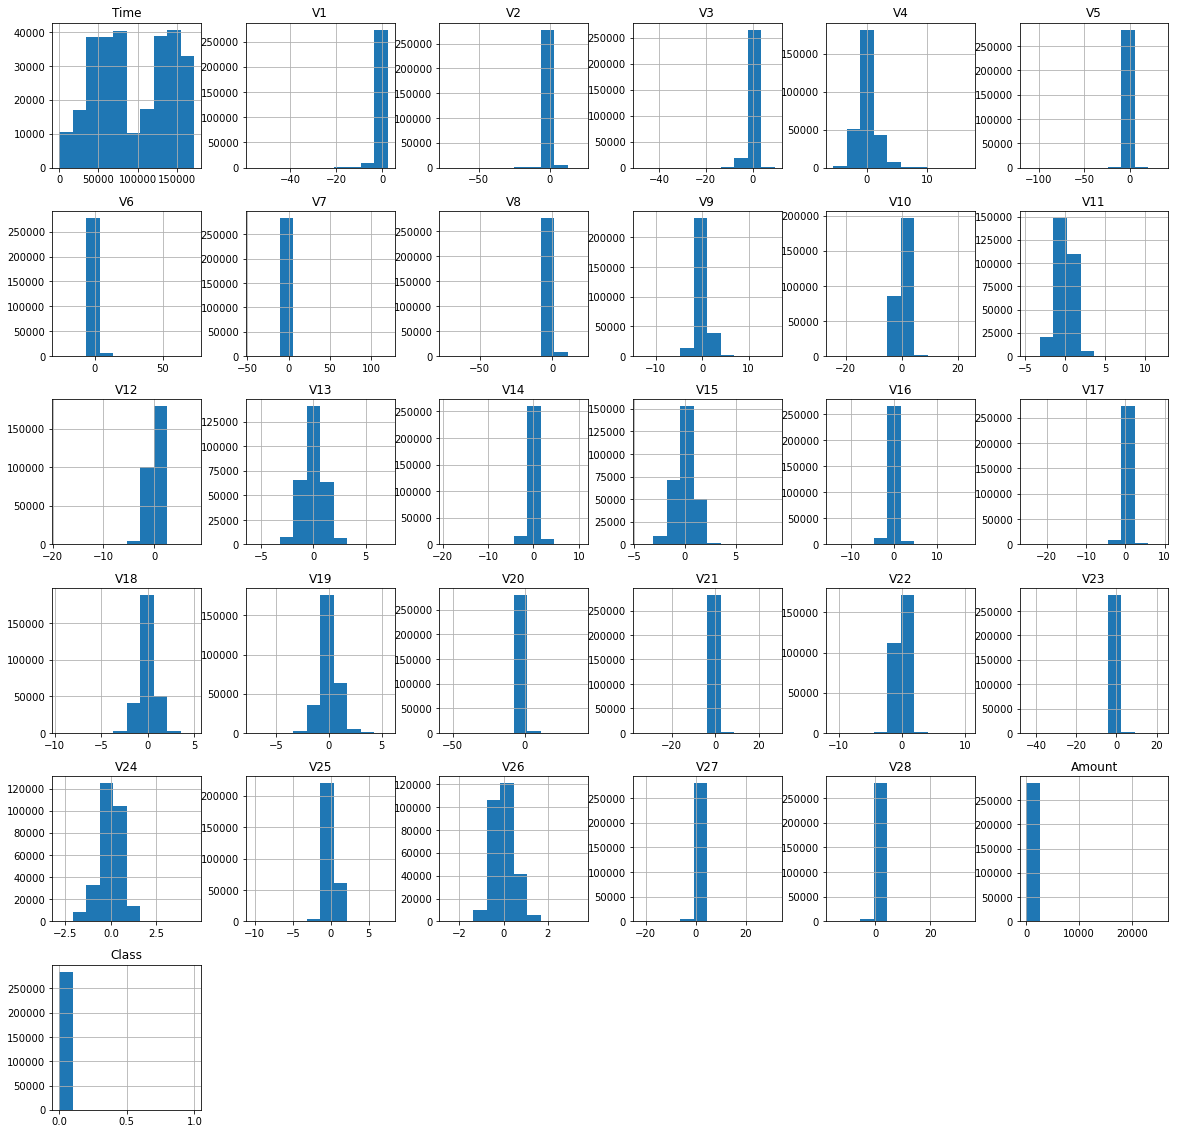

In [33]:
df_creditcard.hist(figsize=(20, 20))
plt.show()

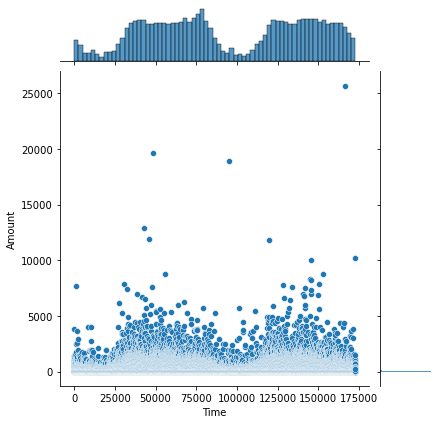

In [35]:
sns.jointplot(x="Time", y="Amount", data=df_creditcard)

In [6]:
# doing a value count to the class column where class0 indicate a non-fraudlent transaction and class1 indicates a 
# fraudlent transaction.
class0 = df_creditcard[df_creditcard['Class'] == 0]

print (len(class0))

class1 = df_creditcard[df_creditcard['Class'] == 1]

print (len(class1))

284315
492


## Sampling the datasets

In [8]:
# to cut down the data size (sampling) we shuffled the class0 (non-fraudlent transaction) and saved 1999 rows to a 
# dataframe and saved it to variable d_temp
temp = shuffle(class0)

d_temp = temp.iloc[:2000, :]

d_temp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278502,168252.0,2.348941,-1.123173,-1.560602,-1.734509,-0.595923,-0.760799,-0.673410,-0.415415,-1.784361,...,0.066887,0.692713,0.040632,0.528125,0.195971,0.047456,-0.011489,-0.052080,25.00,0
52996,45761.0,-0.384714,0.288185,1.114912,-0.199258,-0.602349,-0.855853,0.936674,-0.135876,-0.252829,...,-0.041466,-0.419419,0.356906,0.383056,-0.773832,0.841370,0.018067,0.154780,129.95,0
271980,164852.0,-6.365228,-5.171957,-3.944276,0.415892,-0.778989,0.750090,6.007938,-1.895335,-0.178788,...,-1.032285,1.411995,0.200291,0.558483,1.182064,0.447674,0.188250,0.303181,1101.00,0
125889,77850.0,-0.153929,1.319738,0.693848,1.724870,0.408459,-0.968079,0.630241,-0.130715,-0.751538,...,0.060691,0.242994,-0.180725,0.246875,-0.325977,-0.166824,0.208033,0.202442,1.00,0
241159,150908.0,-0.682146,0.851984,-0.307911,0.110662,0.927673,-0.520762,0.268882,0.459324,-0.907612,...,-0.101135,-0.517595,0.086090,0.630388,-0.809529,0.242265,0.032610,0.073099,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144890,86467.0,-1.003552,0.516813,1.214591,-1.184222,1.137049,-0.662609,0.872725,0.061851,-0.628055,...,-0.234465,-0.885508,-0.298750,-0.421403,0.556204,0.245382,-0.080928,0.027345,1.98,0
22028,31992.0,-0.507778,0.464412,1.899817,1.028461,-0.368167,-0.094932,0.239283,0.144598,-0.045789,...,-0.255093,-0.754121,-0.082793,0.015527,0.009967,0.598951,0.032088,0.076056,41.59,0
12650,22166.0,0.971024,-0.092746,1.567136,2.075675,-0.857678,0.369127,-0.503801,0.108863,2.364079,...,-0.497497,-0.755893,0.117035,0.565938,0.346446,-0.587749,0.063731,0.036216,49.32,0
9775,14490.0,1.144965,-0.213612,0.914178,0.223288,-0.833901,-0.194539,-0.726640,0.165588,1.712232,...,0.006912,0.195980,0.047253,0.208016,0.020492,1.035929,-0.087475,-0.009191,15.95,0


In [9]:
# concatenating the d_temp with the class1 (fraudlent transaction) rows 
frames = [d_temp, class1]
df_temp = pd.concat(frames)

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 278502 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float6

In [11]:
df=shuffle(df_temp)


In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141586,84408.0,1.236872,0.173462,0.091866,0.575646,-0.160457,-0.437177,-0.113057,0.053734,0.309157,...,-0.302943,-0.920227,0.134489,-0.372612,0.134075,0.152068,-0.018139,0.020168,1.98,0
35312,38060.0,1.410675,-0.920579,0.130568,-1.386908,-1.275017,-1.068582,-0.533475,-0.262086,-2.485292,...,-0.438262,-1.038190,0.151219,0.478830,0.235559,-0.517125,-0.003101,0.016364,52.93,0
131258,79536.0,-1.333894,1.325309,1.691594,-0.018299,-0.444247,-0.446008,0.471467,0.416722,-0.756810,...,-0.182823,-0.615566,0.025398,0.398609,0.031015,0.080103,0.032653,0.058260,45.32,0
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
100610,67567.0,-4.007796,-2.788996,1.716717,0.302774,0.934092,-1.805187,-1.570535,0.606917,0.824969,...,-0.222625,-0.773374,-1.211700,0.576271,-0.060400,0.827289,0.555501,-0.806061,70.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87378,61658.0,1.049432,0.242404,0.602180,2.476252,-0.155320,0.146696,-0.009959,0.131740,-0.615280,...,-0.175560,-0.643606,-0.028099,-0.046054,0.380245,-0.148323,-0.020690,0.018321,56.84,0
59560,48894.0,1.125445,-0.241987,0.716803,0.260720,-0.431560,0.534352,-0.648685,0.304039,0.307888,...,0.046010,0.075277,-0.029465,-0.635874,0.122821,0.443718,-0.001803,0.010776,35.89,0
250012,154680.0,1.973810,0.313115,-2.441206,1.495365,0.891927,-0.921381,0.608826,-0.248049,0.360644,...,-0.044372,-0.068157,-0.015870,0.439214,0.432732,-0.513379,-0.017507,-0.020929,40.46,0
256372,157659.0,-0.399495,1.036782,0.095845,-0.919341,1.532622,-0.123532,1.034945,0.012567,-0.777497,...,-0.264700,-0.788094,-0.189154,0.015189,-0.116857,0.174763,0.053916,0.140704,1.29,0


In [14]:
df.to_csv('data\sampled_creditcard.csv')